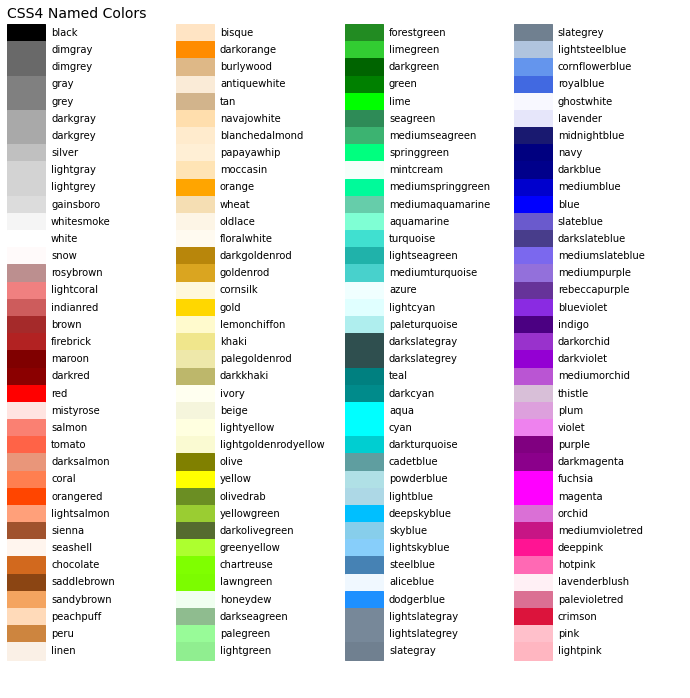

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, sort_colors=True):
    """Plot a table of named colors."""
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    if sort_colors:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * nrows + topmargin, 0)
    ax.axis("off")
    ax.set_title("CSS4 Named Colors", fontsize=14, loc="left")

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        x = col * cell_width
        y = row * cell_height

        ax.text(x + swatch_width + 7, y + cell_height / 2, name, fontsize=10,
                verticalalignment='center')
        ax.add_patch(plt.Rectangle((x, y), swatch_width, cell_height, color=colors[name]))

    return fig

# Usage
plot_colortable(mcolors.CSS4_COLORS)
plt.show()


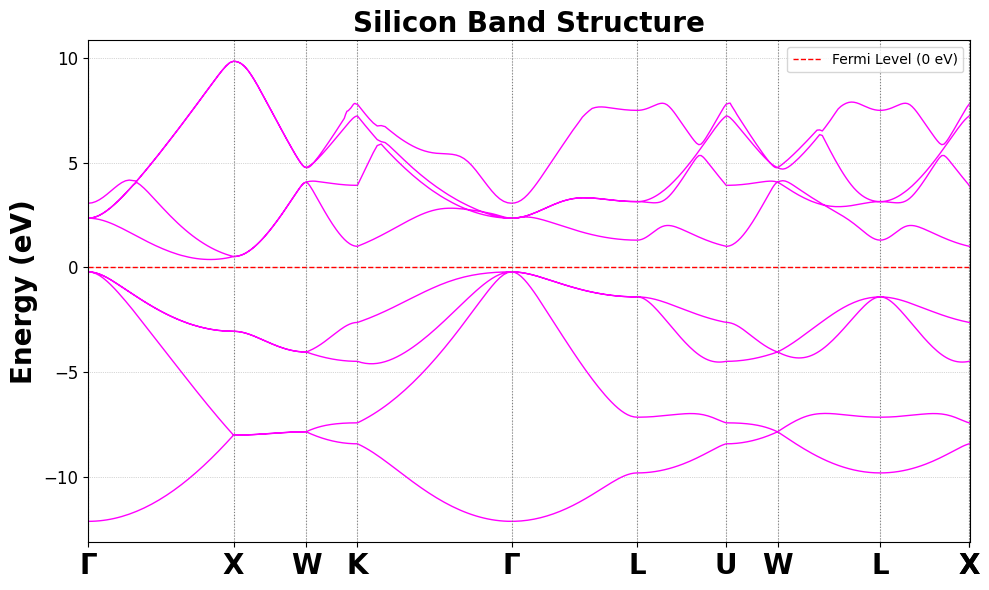

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = np.loadtxt("SiBS.dat")  # Replace with your file path if needed

# Separate the columns
k_points = data[:, 0]
energies = data[:, 1:]

# Get number of bands
num_bands = energies.shape[1]

# Fermi level setup
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# Plot
plt.figure(figsize=(10, 6))

# Plot energy bands
for i in range(num_bands):
    plt.plot(k_points, energies[:, i], color='fuchsia', lw=1)

# Fermi level line
plt.axhline(fermi_level, color='red', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

# Set plot limits first to safely use them for label positioning
ymin, ymax = np.min(energies), np.max(energies)
plt.ylim(ymin - 1, ymax + 1)

# Draw vertical lines for high-symmetry points
for i in high_symmetry_points:
    plt.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Aesthetic settings
plt.title("Silicon Band Structure", fontsize=20, weight='bold')
plt.ylabel("Energy (eV)", fontsize=20, weight='bold')

# Set x-ticks and bold labels
plt.xticks(ticks=tick_positions, labels=high_symmetry_labels, fontsize=20, weight='bold')
plt.xlim([0,7.01])
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


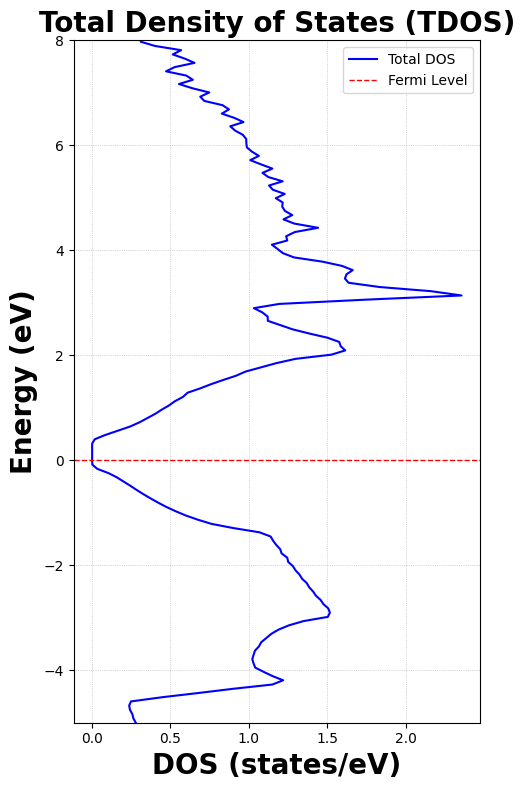

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt("TDOS.dat")

# Determine format
if data.shape[1] == 3:
    energy = data[:, 0]
    dos_up = data[:, 1]
    dos_down = data[:, 2]
    spin_polarized = True
elif data.shape[1] == 2:
    energy = data[:, 0]
    dos = data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in TDOS.dat")

# Plotting
plt.figure(figsize=(5, 8))  # Portrait orientation

if spin_polarized:
    plt.plot(dos_up, energy, label='Spin Up', color='hotpink')
    plt.plot(-dos_down, energy, label='Spin Down', color='red')  # Flip for symmetry
    plt.xlabel("DOS (states/eV, Up / -Down)", fontsize=20,weight='bold')
else:
    plt.plot(dos, energy, label='Total DOS', color='blue')
    plt.xlabel("DOS (states/eV)", fontsize=20 , weight='bold')

# Fermi level at 0 eV
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1, label='Fermi Level')
plt.ylim([-5,8])
# Aesthetics
plt.ylabel("Energy (eV)", fontsize=20, weight='bold')
plt.title("Total Density of States (TDOS)", fontsize=20, weight='bold')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


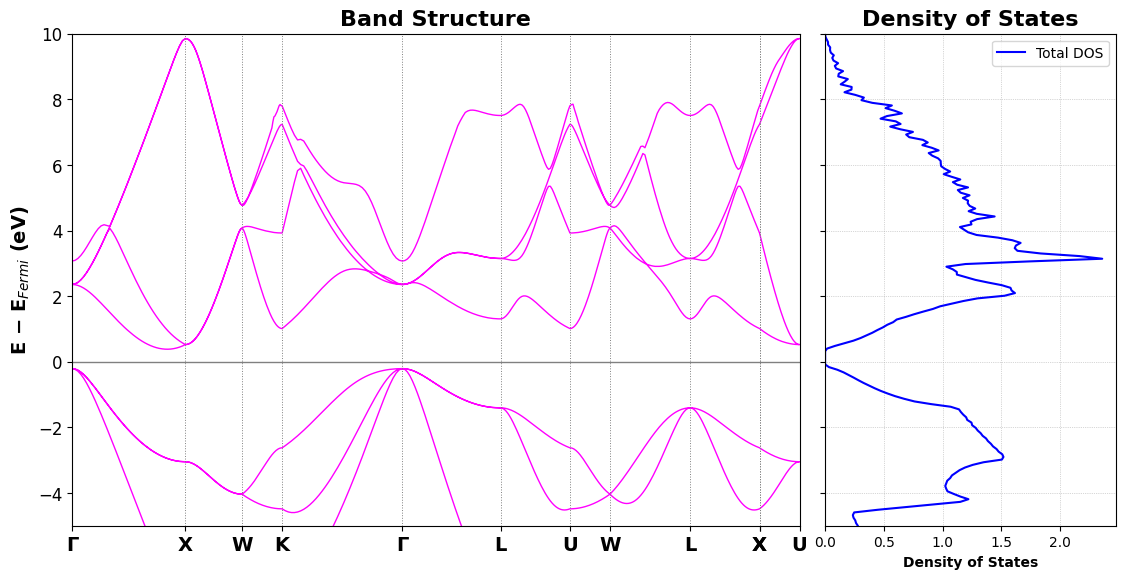

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("SiBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Verify k-point range to avoid singular plot
if np.isclose(k_points.min(), k_points.max()):
    raise ValueError("All k-points have the same value. Check SiBS.dat content.")

# CBM and VBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# High-symmetry points
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("TDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected format in TDOS.dat")

# === Plot ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='fuchsia', lw=1)

ax1.axhline(fermi_level, color='gray', linestyle='-', lw=1)

for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', lw=0.7)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=14, weight='bold')
ax1.set_ylabel("E − E$_{Fermi}$ (eV)", fontsize=14, weight='bold')

ax1.set_xlim([k_points.min(), k_points.max()])
ax1.set_ylim([-5, 10])
ax1.set_title("Band Structure", fontsize=16, weight='bold')
ax1.tick_params(axis='y', labelsize=12)
#ax1.set_facecolor("#e6e6e6")

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label="Spin Up", color='black')
    ax2.plot(-dos_down, energy, label="Spin Down", color='red')
else:
    ax2.plot(dos, energy, color='blue', label="Total DOS")

ax2.set_xlabel("Density of States", fontsize=10,weight='bold')
ax2.set_xlim(left=0)
ax2.set_ylim([-5, 10])
ax2.tick_params(axis='y', labelleft=False)
ax2.legend()
ax2.grid(True, linestyle=':', linewidth=0.5)
#ax2.set_facecolor("#e6e6e6")
ax2.set_title("Density of States", fontsize=16, weight='bold')

# === Final layout adjustment ===
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()


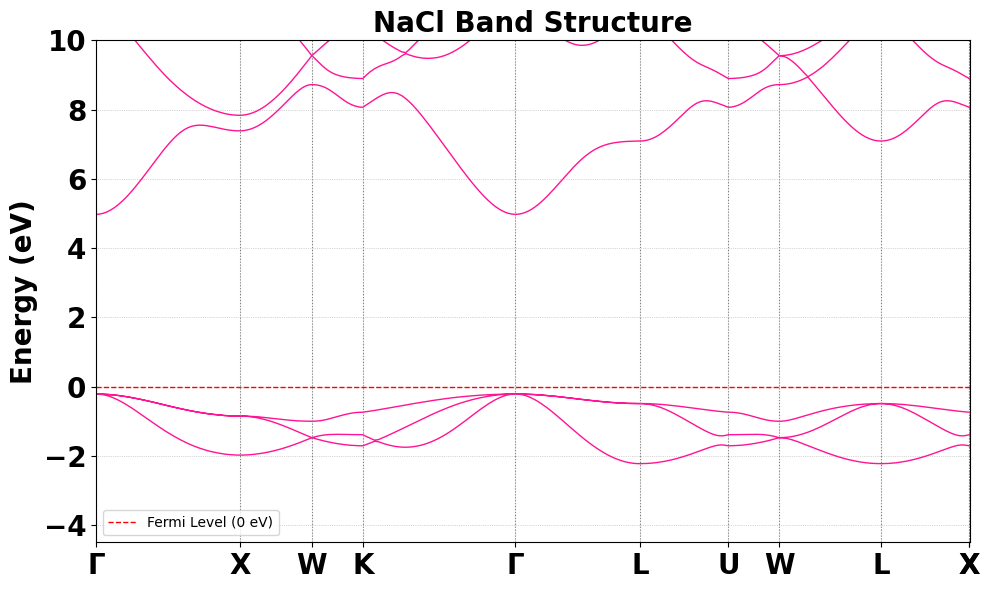

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = np.loadtxt("NaClBS.dat")  # Using the uploaded NaCl band structure file

# Separate the columns
k_points = data[:, 0]
energies = data[:, 1:]

# Get number of bands
num_bands = energies.shape[1]

# Fermi level setup
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# Plot
plt.figure(figsize=(10, 6))

# Plot energy bands
for i in range(num_bands):
    plt.plot(k_points, energies[:, i], color='deeppink', lw=1)

# Fermi level line
plt.axhline(fermi_level, color='red', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

# Set plot limits first to safely use them for label positioning
ymin, ymax = np.min(energies), np.max(energies)
plt.ylim(ymin - 1, ymax + 1)

# Draw vertical lines for high-symmetry points
for i in high_symmetry_points:
    plt.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Aesthetic settings
plt.title("NaCl Band Structure", fontsize=20, weight='bold')
plt.ylabel("Energy (eV)", fontsize=20,weight='bold')

# Set x-ticks and bold labels
plt.xticks(ticks=tick_positions, labels=high_symmetry_labels, fontsize=20, weight='bold')
plt.xlim([0,6.830])
plt.ylim([-4.5,10])
plt.yticks(fontsize=20,weight='bold')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


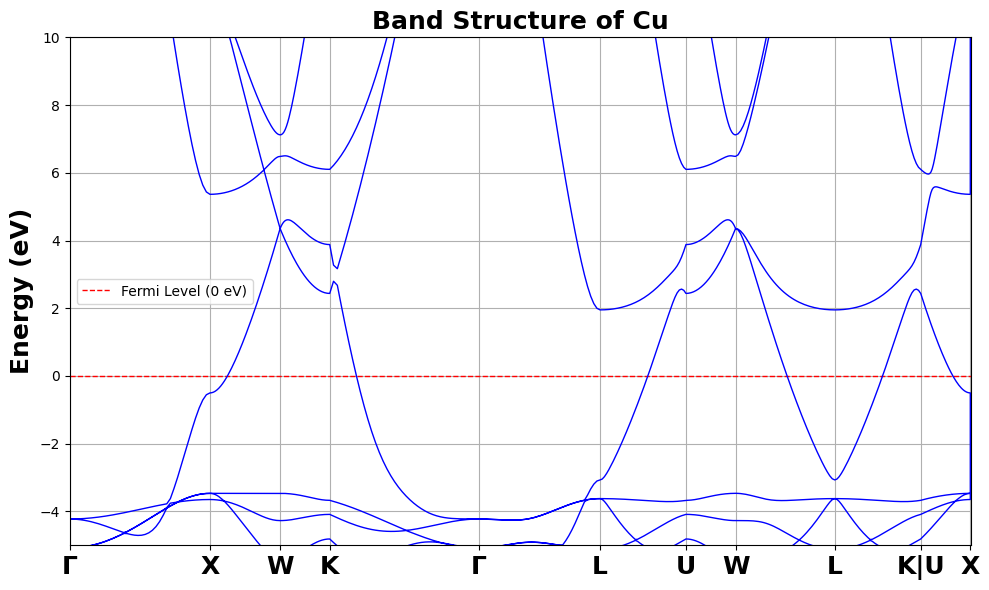

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt("CuBS.dat")  # Make sure the file is in the same directory or provide full path

# Extract k-points and energy values
k_points = data[:, 0]
energies = data[:, 1]

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K|U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# Plotting
plt.figure(figsize=(10, 6))

# Fermi level line
plt.axhline(fermi_level, color='red', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

plt.xticks(ticks=tick_positions, labels=high_symmetry_labels, fontsize=18, weight='bold')
plt.plot(k_points, energies, color='blue', linewidth=1)
#plt.xlabel("K-point")
plt.ylabel("Energy (eV)",fontsize=18,weight='bold')
plt.xlim([0,11.28])
plt.ylim([-5,10])
plt.title("Band Structure of Cu",fontsize=18,weight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


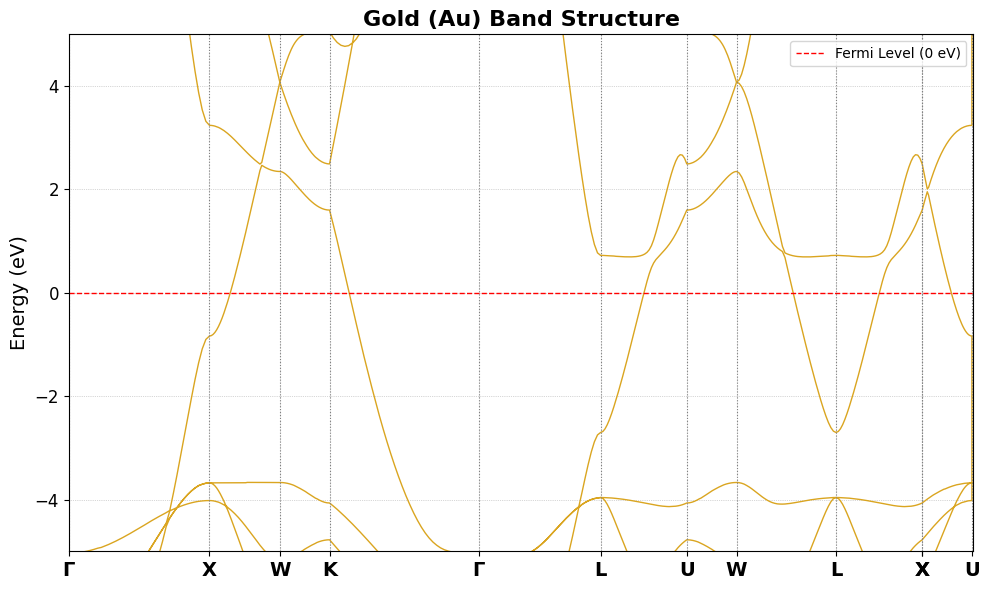

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = np.loadtxt("AuBS.dat")  # Using the uploaded Gold band structure file

# Separate the columns
k_points = data[:, 0]
energies = data[:, 1:]

# Get number of bands
num_bands = energies.shape[1]

# Fermi level setup
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# Plot
plt.figure(figsize=(10, 6))

# Plot energy bands
for i in range(num_bands):
    plt.plot(k_points, energies[:, i], color='goldenrod', lw=1)

# Fermi level line
plt.axhline(fermi_level, color='red', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

# Set plot limits first to safely use them for label positioning
ymin, ymax = np.min(energies), np.max(energies)
plt.ylim(ymin - 1, ymax + 1)

# Draw vertical lines for high-symmetry points
for i in high_symmetry_points:
    plt.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Aesthetic settings
plt.title("Gold (Au) Band Structure", fontsize=16, weight='bold')
plt.ylabel("Energy (eV)", fontsize=14)

# Set x-ticks and bold labels
plt.xticks(ticks=tick_positions, labels=high_symmetry_labels, fontsize=14, weight='bold')
plt.xlim([0,9.685])
plt.ylim([-5,5])
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


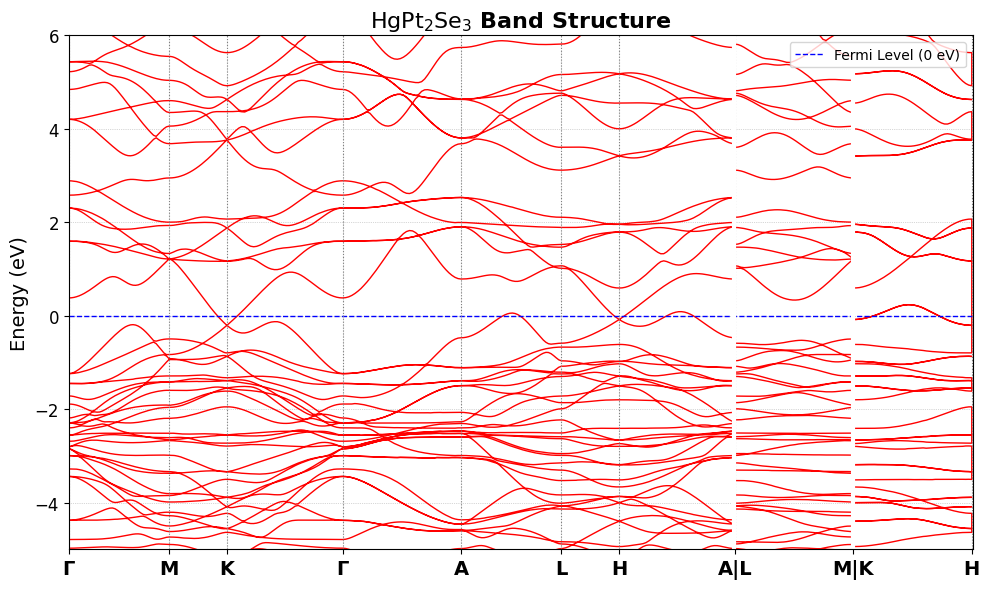

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = np.loadtxt("HgPtSeBS.dat")  # Using the uploaded Gold band structure file

# Separate the columns
k_points = data[:, 0]
energies = data[:, 1:]

# Get number of bands
num_bands = energies.shape[1]

# Fermi level setup
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels =  ['Γ', 'M', 'K', 'Γ', 'A', 'L', 'H', 'A|L', 'M|K', 'H']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# Plot
plt.figure(figsize=(10, 6))

# Plot energy bands
for i in range(num_bands):
    plt.plot(k_points, energies[:, i], color='red', lw=1)

# Fermi level line
plt.axhline(fermi_level, color='blue', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

# Set plot limits first to safely use them for label positioning
ymin, ymax = np.min(energies), np.max(energies)
plt.ylim(ymin - 1, ymax + 1)

# Draw vertical lines for high-symmetry points
for i in high_symmetry_points:
    plt.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Aesthetic settings
plt.title(r"$\mathrm{HgPt_2Se_3}$ Band Structure", fontsize=16, weight='bold')

plt.axvline(x=3.24, color='white', linestyle='-', linewidth=3)
plt.axvline(x=3.82, color='white', linestyle='-', linewidth=3)


plt.ylabel("Energy (eV)", fontsize=14)

# Set x-ticks and bold labels
plt.xticks(ticks=tick_positions, labels=high_symmetry_labels, fontsize=14, weight='bold')
plt.xlim([0,4.405])
plt.ylim([-5,6])
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend(loc='upper right')  
plt.tight_layout()
plt.show()


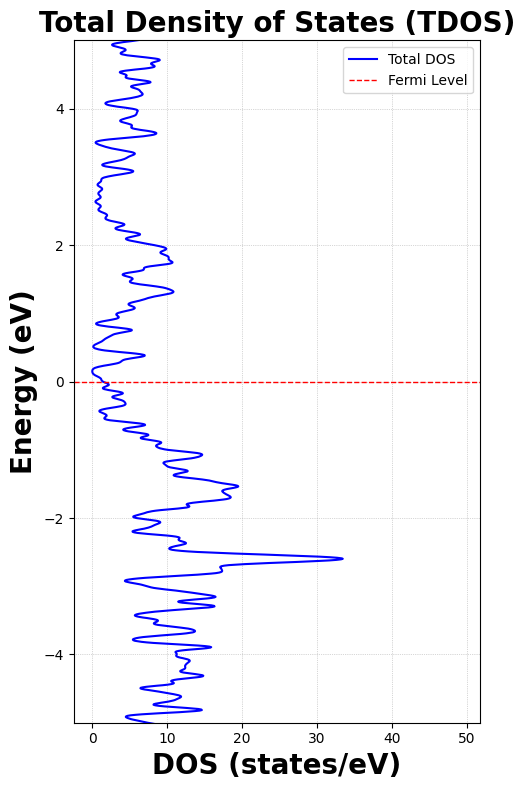

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt("HgPtSeDOS.dat")

# Determine format
if data.shape[1] == 3:
    energy = data[:, 0]
    dos_up = data[:, 1]
    dos_down = data[:, 2]
    spin_polarized = True
elif data.shape[1] == 2:
    energy = data[:, 0]
    dos = data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in TDOS.dat")

# Plotting
plt.figure(figsize=(5, 8))  # Portrait orientation

if spin_polarized:
    plt.plot(dos_up, energy, label='Spin Up', color='hotpink')
    plt.plot(-dos_down, energy, label='Spin Down', color='red')  # Flip for symmetry
    plt.xlabel("DOS (states/eV, Up / -Down)", fontsize=20,weight='bold')
else:
    plt.plot(dos, energy, label='Total DOS', color='blue')
    plt.xlabel("DOS (states/eV)", fontsize=20 , weight='bold')

# Fermi level at 0 eV
plt.axhline(y=0.0, color='red', linestyle='--', linewidth=1, label='Fermi Level')
plt.ylim([-5,5])
# Aesthetics
plt.ylabel("Energy (eV)", fontsize=20, weight='bold')
plt.title("Total Density of States (TDOS)", fontsize=20, weight='bold')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


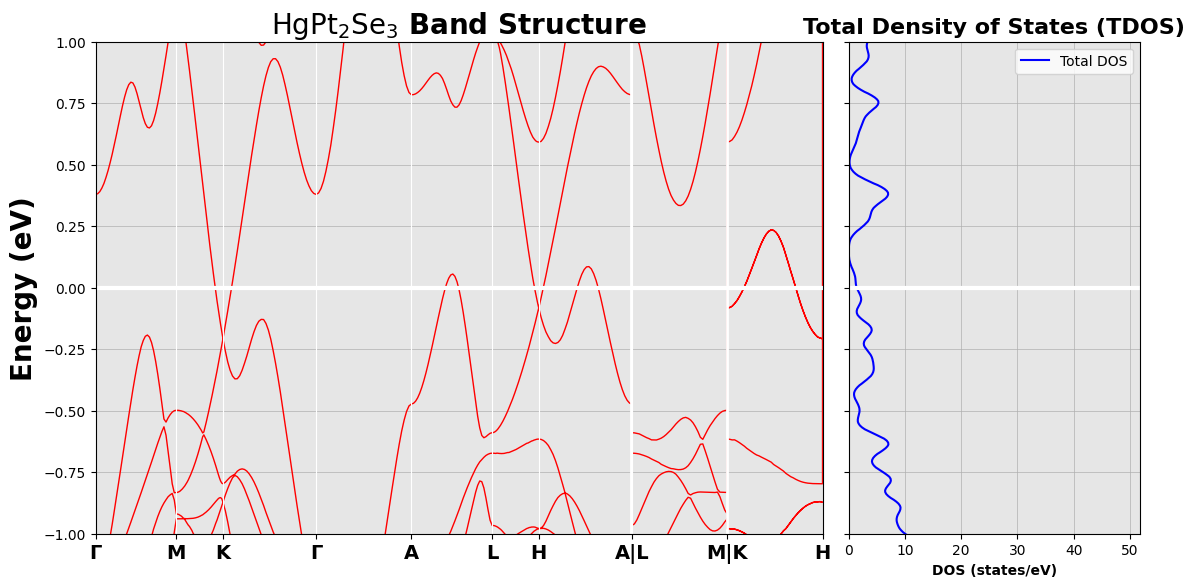

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("HgPtSeBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Band edges
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# High-symmetry points
high_symmetry_labels = ['Γ', 'M', 'K', 'Γ', 'A', 'L', 'H', 'A|L', 'M|K', 'H']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("HgPtSeDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
else:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='red', lw=1)

# Fermi level
#ax1.axhline(fermi_level, color='blue', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')
ax1.axhline(fermi_level, color='white', linestyle='-', linewidth=3)

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='white', linestyle='-', linewidth=0.8)

# Additional symmetry markers
ax1.axvline(x=3.239, color='white', linestyle='-', linewidth=2)
ax1.axvline(x=3.825, color='white', linestyle='-', linewidth=2)

# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=14, weight='bold')
ax1.set_xlim([0, 4.405])
ax1.set_ylim([-1, 1])
ax1.set_ylabel("Energy (eV)", fontsize=20,weight='bold')
ax1.set_title(r"$\mathrm{HgPt_2Se_3}$ Band Structure", fontsize=20, weight='bold')
#ax1.legend(loc='upper right')
ax1.grid(True, linestyle='-', linewidth=0.5)
ax1.set_facecolor("#e6e6e6")

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=14, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='blue')
    ax2.set_xlabel("DOS (states/eV)", fontsize=10, weight='bold')

ax2.axhline(y=0.0, color='white', linestyle='-', linewidth=3)
ax2.set_xlim(left=0)
ax2.set_ylim([-1, 1])
ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total Density of States (TDOS)", fontsize=16, weight='bold')
ax2.grid(True, linestyle='-', linewidth=0.5)
ax2.legend()
ax2.set_facecolor("#e6e6e6")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()


In [1]:
print("hello")

hello
